In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'data.csv'

In [3]:
total_df = pd.read_csv(file)
# deletes last column 'Unnamed: 32'
total_df = total_df.iloc[:, :-1]
total_df=total_df.drop(total_df.columns[0], axis=1)
total_df['diagnosis']= total_df['diagnosis'].replace({'M': 1, 'B': 0})

In [4]:
total_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [5]:
import pandas_profiling
total_df.profile_report()

In [6]:
columns=total_df.columns.to_list()
columns.pop(0)
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [7]:
malignant_df = total_df.loc[total_df['diagnosis']==1]
benign_df = total_df.loc[total_df['diagnosis']==0]

In [8]:
malignant_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
benign_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19          0       13.540         14.36           87.46      566.3   
20          0       13.080         15.71           85.63      520.0   
21          0        9.504         12.44           60.34      273.9   
37          0       13.030         18.42           82.61      523.8   
46          0        8.196         16.84           51.71      201.9   

    smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
19          0.09779           0.08129         0.06664             0.047810   
20          0.10750           0.12700         0.04568             0.031100   
21          0.10240           0.06492         0.02956             0.020760   
37          0.08983           0.03766         0.02562             0.029230   
46          0.08600           0.05943         0.01588             0.005917   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
19         0.1885  ...        15.110          19.26            99.70   
20         0.1967  ...        14.500          20.49            96.09   
21         0.1815  ...        10.230          15.66            65.13   
37         0.1467  ...        13.300          22.81            84.46   
46         0.1769  ...         8.964          21.96            57.26   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
19       711.2           0.14400            0.17730          0.23900   
20       630.5           0.13120            0.27760          0.18900   
21       314.9           0.13240            0.11480          0.08867   
37       545.9           0.09701            0.04619          0.04833   
46       242.2           0.12970            0.13570          0.06880   

    concave_points_worst  symmetry_worst  fractal_dimension_worst  
19               0.12880          0.2977                  0.07259  
20               0.07283          0.3184                  0.08183  
21               0.06227          0.2450                  0.07773  
37               0.05013          0.1987                  0.06169  
46               0.02564          0.3105                  0.07409  

[5 rows x 31 columns]

# Factor Analysis

In [10]:
from sklearn.decomposition import FactorAnalysis
X, y = total_df.drop(['diagnosis'], axis =1), total_df.diagnosis
factor = FactorAnalysis(n_components=30, random_state=7).fit(X)
factor.get_params()

{'copy': True,
 'iterated_power': 3,
 'max_iter': 1000,
 'n_components': 30,
 'noise_variance_init': None,
 'random_state': 7,
 'svd_method': 'randomized',
 'tol': 0.01}

In [11]:
factor.components_

array([[ 3.38547424e+00,  1.46203187e+00,  2.33473608e+01,
         3.43999697e+02,  2.82023111e-03,  2.69756819e-02,
         5.45406853e-02,  3.18036734e-02,  4.71149158e-03,
        -1.74498388e-03,  2.08818237e-01, -4.33338116e-02,
         1.48846156e+00,  3.70898871e+01, -5.36308320e-04,
         3.67403370e-03,  5.90506568e-03,  2.18283443e-03,
        -8.25954614e-04, -5.68599999e-05,  4.76217084e+00,
         2.04158815e+00,  3.29189724e+01,  5.67114378e+02,
         4.27289579e-03,  6.74132135e-02,  1.12443406e-01,
         4.90336424e-02,  1.19140645e-02,  1.07402297e-03],
       [ 7.93518933e-01, -2.46018093e-01,  5.36116784e+00,
         7.27213844e+01, -1.26735775e-03, -2.29431098e-04,
         6.41009949e-03,  3.95753408e-03, -2.15817219e-03,
        -1.37864289e-03, -4.70809554e-03,  2.96460506e-02,
         6.92369328e-02,  6.20170223e-01,  1.26410582e-04,
         1.08657886e-03,  2.44753573e-03,  7.99660439e-04,
         1.04558263e-03,  2.42654562e-05, -4.83269942e-

In [12]:
factor_df = pd.DataFrame(factor.components_, columns=columns)

In [13]:
factor_df.max()

radius_mean                  3.385474
texture_mean                 1.462032
perimeter_mean              23.347361
area_mean                  343.999697
smoothness_mean              0.006879
compactness_mean             0.028559
concavity_mean               0.054541
concave_points_mean          0.031804
symmetry_mean                0.012301
fractal_dimension_mean       0.005003
radius_se                    0.208818
texture_se                   0.167051
perimeter_se                 1.488462
area_se                     37.089887
smoothness_se                0.001238
compactness_se               0.010378
concavity_se                 0.016828
concave_points_se            0.002587
symmetry_se                  0.003059
fractal_dimension_se         0.001581
radius_worst                 4.762171
texture_worst                2.041588
perimeter_worst             32.918972
area_worst                 567.114378
smoothness_worst             0.010864
compactness_worst            0.075659
concavity_wo

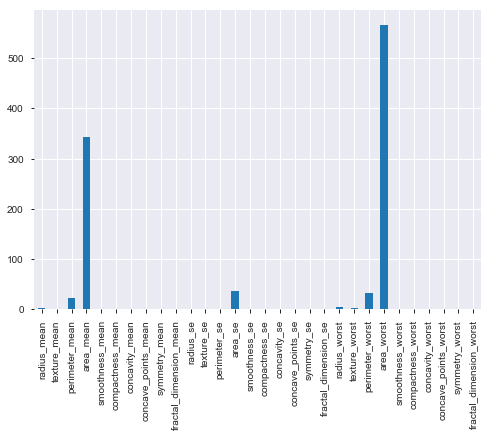

In [14]:
factor_df.max().plot(kind='bar')

# Kaiser-Meyer-Olkin Test

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(total_df)

kmo_model

0.843143228525536

In [16]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(total_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.39177709e+01, 5.72635217e+00, 2.84684948e+00, 1.99836314e+00,
       1.65907858e+00, 1.20750790e+00, 6.84719154e-01, 4.84855438e-01,
       4.16894830e-01, 3.50893638e-01, 3.04855395e-01, 2.90985845e-01,
       2.61010421e-01, 2.12275550e-01, 1.48576184e-01, 8.81625619e-02,
       7.98601726e-02, 5.90353306e-02, 5.14619081e-02, 4.82159487e-02,
       3.07062788e-02, 2.95266509e-02, 2.73446674e-02, 2.42835925e-02,
       1.75522144e-02, 1.54733379e-02, 8.05614370e-03, 6.86973193e-03,
       1.58846728e-03, 7.41678754e-04, 1.32634701e-04])

# Scree Plot

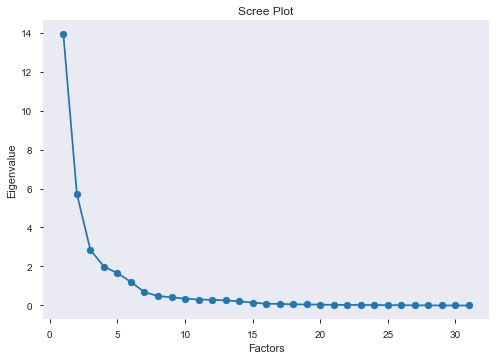

<Figure size 576x396 with 0 Axes>

In [17]:
plt.scatter(range(1,total_df.shape[1]+1),ev)
plt.plot(range(1,total_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
print(f'Explained variance by component: %s' % pca.explained_variance_ratio_)
# print(pca.explained_variance_ratio_)
pd.DataFrame(pca.components_,columns=columns)
# which covariates are in which PC???

Explained variance by component: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      0.005086      0.002197        0.035076   0.516826         0.000004   
1      0.009287     -0.002882        0.062748   0.851824        -0.000015   
2     -0.012343     -0.006355       -0.071669  -0.027894         0.000073   
3     -0.034238     -0.362415       -0.329281   0.039412        -0.000344   
4      0.035456     -0.443187        0.313383  -0.046038         0.000579   
5     -0.131213     -0.213486       -0.840324   0.052347        -0.000407   
6      0.033513     -0.784253        0.189075  -0.007338         0.001608   
7     -0.075492     -0.068741        0.083964  -0.003010         0.003437   
8     -0.350549      0.004084        0.132828  -0.003829         0.008227   
9      0.139560      0.076668       -0.089211   0.001956        -0.004447   
10    -0.419347      0.029017        0.002689   0.003445         0.029137   
11     0.735142     -0.001770       -0.081781  -0.001463        -0.046339   
12     0.218087      0.004231       -0.025118  -0.000201         0.005253   
13     0.081026      0.001985       -0.005229  -0.000338         0.036116   
14    -0.137866      0.007075        0.013443   0.000190        -0.053716   
15    -0.141957     -0.003718        0.020684   0.000072        -0.244151   
16     0.044213     -0.001744       -0.010828   0.000133        -0.130031   
17     0.089729     -0.000141       -0.013778   0.000001         0.306212   
18    -0.021006     -0.001250        0.000616   0.000120        -0.197107   
19    -0.080107      0.000213        0.010940   0.000122         0.064946   
20     0.059475     -0.000508       -0.010015   0.000067         0.050588   
21    -0.008724      0.000326        0.003179  -0.000086        -0.123800   
22    -0.004578      0.000571        0.001251  -0.000009         0.057668   
23     0.028289      0.000073       -0.003584  -0.000026        -0.684974   
24     0.003596      0.000432       -0.000308  -0.000018        -0.470764   
25    -0.001603     -0.000686        0.000134  -0.000006        -0.233740   
26    -0.002793     -0.000203       -0.000148   0.000028         0.042369   
27    -0.003259     -0.000109        0.000592  -0.000003        -0.044311   
28    -0.000513     -0.000129        0.000283  -0.000013         0.094393   
29     0.000648      0.000005       -0.000153   0.000002         0.002955   

    compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.000041        0.000082             0.000048       0.000007   
1          -0.000003        0.000075             0.000046      -0.000025   
2           0.000102        0.000266             0.000036       0.000141   
3          -0.003005       -0.003408            -0.001247      -0.000967   
4           0.002526        0.002195             0.001132       0.000937   
5          -0.001015        0.000276            -0.000576      -0.000179   
6           0.000277        0.001024             0.000905       0.000598   
7           0.015573        0.019251             0.009073       0.009150   
8           0.056315        0.070230             0.019250       0.014990   
9          -0.029948       -0.027944            -0.010436      -0.008278   
10          0.116712        0.185700             0.057721       0.051728   
11         -0.094469        0.033567            -0.047538      -0.055235   
12          0.087758       -0.224378            -0.040442       0.115113   
13         -0.025431        0.128761             0.054837       0.326359   
14         -0.096147       -0.106776            -0.075023      -0.052419   
15         -0.173133       -0.163916            -0.311870      -0.092031   
16          0.180413        0.432653             0.038894       0.021686   
17          0.287100        0.199451            -0.013839       0.438305   
18         -0.055315       -0.042006             0.044477       0.763628   
19          0.042947       -0.667236            -0.328925       0.222383   
20          0.786476

# Overall Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# print(LinearRegression().get_params())
# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.7743246526421793


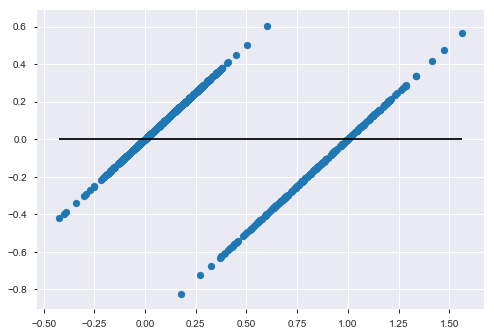

In [20]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# Malignant Linear Regression

In [21]:
X_malignant, y_malignant = malignant_df.drop(['diagnosis'], axis =1), malignant_df.diagnosis

In [22]:
model.fit(X_malignant, y_malignant)
malignant_score = model.score(X_malignant, y_malignant)
print(f"R2 Score: {malignant_score}")

R2 Score: 1.0


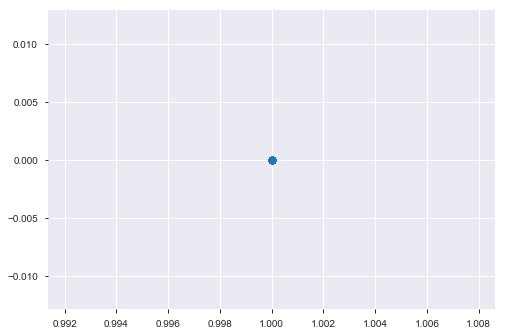

In [23]:
m_predictions = model.predict(X_malignant)
# Plot Residuals
plt.scatter(m_predictions, m_predictions - y_malignant)
plt.hlines(y=0, xmin=m_predictions.min(), xmax=m_predictions.max())
plt.show()

# Benign Linear Regression

In [24]:
X_benign, y_benign = benign_df.drop(['diagnosis'], axis =1), benign_df.diagnosis

In [25]:
model.fit(X_benign, y_benign)
benign_score = model.score(X_benign, y_benign)
print(f"R2 Score: {benign_score}")

R2 Score: 1.0


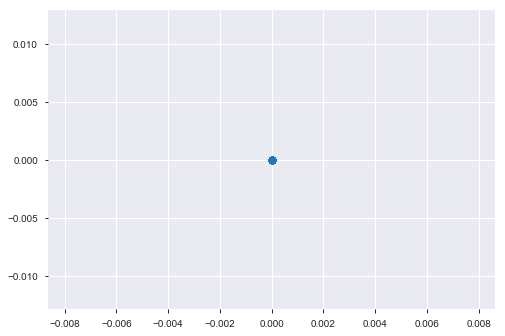

In [26]:
b_predictions = model.predict(X_benign)
# Plot Residuals
plt.scatter(b_predictions, b_predictions - y_benign)
plt.hlines(y=0, xmin=b_predictions.min(), xmax=b_predictions.max())
plt.show()

# Overall Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.2, train_size=0.8)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9516483516483516
Testing Data Score: 0.9736842105263158


In [31]:
XArray = X.as_matrix(columns=None)
#print(XArray)

In [32]:
yArray = y.as_matrix(columns=None)
#print(yArray)

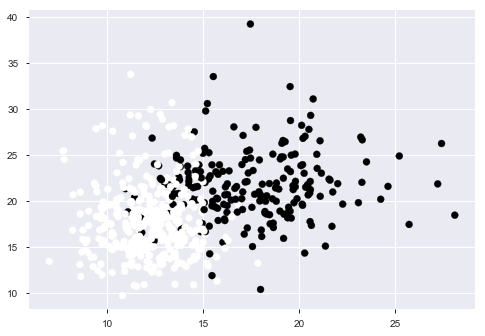

In [33]:
plt.scatter(XArray[:, 0], 
            XArray[:, 1], 
            c=yArray)
plt.savefig('logistical_regression_scatter.png')


In [34]:
predictions = classifier.predict(X_test)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test})

# Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
model = SVC(kernel='linear')
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)


In [36]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=1, gamma=0.0001, score=0.9276315789473685, total=   1.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.9671052631578947, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.9337748344370861, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9276315789473685, total=   1.3s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9671052631578947, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9337748344370861, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9276315789473685, total=   1.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9671052631578947, total=   0.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9337748344370861, total=   0.3s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   57.7s finished


{'C': 1, 'gamma': 0.0001}
0.9428571428571428


# KNeighbors

In [37]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000 / 0.912
k: 3, Train/Test Score: 0.956 / 0.930
k: 5, Train/Test Score: 0.943 / 0.921
k: 7, Train/Test Score: 0.936 / 0.947
k: 9, Train/Test Score: 0.943 / 0.947
k: 11, Train/Test Score: 0.932 / 0.956
k: 13, Train/Test Score: 0.938 / 0.956
k: 15, Train/Test Score: 0.927 / 0.956
k: 17, Train/Test Score: 0.930 / 0.947
k: 19, Train/Test Score: 0.932 / 0.939


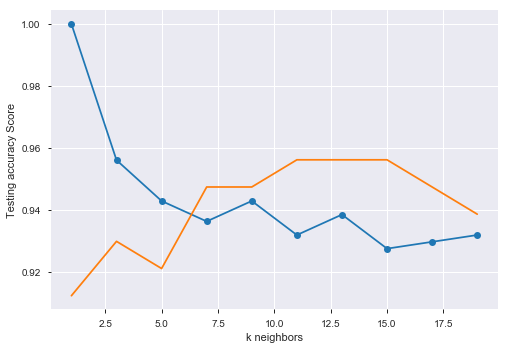

In [38]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:.3f} / {test_score:.3f}')
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)

1.0

In [41]:
importances = rf.feature_importances_
importances

array([0.03680988, 0.01590131, 0.05090738, 0.0656929 , 0.00719186,
       0.00820746, 0.05863525, 0.08546132, 0.00431043, 0.00373225,
       0.01763042, 0.0037371 , 0.00931766, 0.0465833 , 0.00498549,
       0.00387968, 0.0053765 , 0.00660798, 0.00409012, 0.00421917,
       0.10896786, 0.01970863, 0.12026966, 0.10840494, 0.0115345 ,
       0.01710992, 0.02707617, 0.12544604, 0.0104046 , 0.00780022])

In [42]:
sorted(zip(rf.feature_importances_, columns), reverse=True)

[(0.12544604496308634, 'concave_points_worst'),
 (0.12026965734938068, 'perimeter_worst'),
 (0.10896785927977748, 'radius_worst'),
 (0.10840494030848652, 'area_worst'),
 (0.0854613180213716, 'concave_points_mean'),
 (0.06569289601466755, 'area_mean'),
 (0.05863524647217266, 'concavity_mean'),
 (0.050907383024171526, 'perimeter_mean'),
 (0.04658330476969199, 'area_se'),
 (0.03680988025033666, 'radius_mean'),
 (0.027076169616875593, 'concavity_worst'),
 (0.01970863162833181, 'texture_worst'),
 (0.017630423690921458, 'radius_se'),
 (0.017109923000587408, 'compactness_worst'),
 (0.01590130926805972, 'texture_mean'),
 (0.011534499148707956, 'smoothness_worst'),
 (0.0104045981518661, 'symmetry_worst'),
 (0.009317659217902266, 'perimeter_se'),
 (0.008207457094809672, 'compactness_mean'),
 (0.007800219988067766, 'fractal_dimension_worst'),
 (0.0071918595377352575, 'smoothness_mean'),
 (0.00660798026695783, 'concave_points_se'),
 (0.0053765017303299125, 'concavity_se'),
 (0.004985486656629084, 

# Correlation

In [43]:
import seaborn as sns; sns.set()
sns.set(style="white")

In [44]:
corr = total_df.corr()

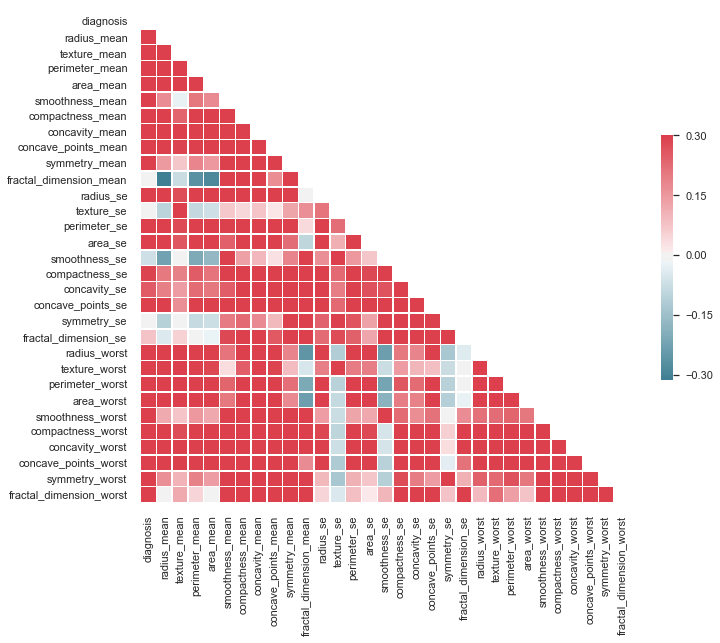

In [45]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Deep Learning

In [46]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [47]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=30))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [51]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)



Epoch 1/100
455/455 - 0s - loss: 0.8510 - acc: 0.4945
Epoch 2/100
455/455 - 0s - loss: 0.6107 - acc: 0.6615
Epoch 3/100
455/455 - 0s - loss: 0.4587 - acc: 0.7714
Epoch 4/100
455/455 - 0s - loss: 0.3691 - acc: 0.8527
Epoch 5/100
455/455 - 0s - loss: 0.3146 - acc: 0.8813
Epoch 6/100
455/455 - 0s - loss: 0.2768 - acc: 0.9011
Epoch 7/100
455/455 - 0s - loss: 0.2511 - acc: 0.9077
Epoch 8/100
455/455 - 0s - loss: 0.2307 - acc: 0.9187
Epoch 9/100
455/455 - 0s - loss: 0.2156 - acc: 0.9297
Epoch 10/100
455/455 - 0s - loss: 0.2027 - acc: 0.9341
Epoch 11/100
455/455 - 0s - loss: 0.1923 - acc: 0.9363
Epoch 12/100
455/455 - 0s - loss: 0.1828 - acc: 0.9363
Epoch 13/100
455/455 - 0s - loss: 0.1745 - acc: 0.9407
Epoch 14/100
455/455 - 0s - loss: 0.1675 - acc: 0.9429
Epoch 15/100
455/455 - 0s - loss: 0.1608 - acc: 0.9473
Epoch 16/100
455/455 - 0s - loss: 0.1541 - acc: 0.9516
Epoch 17/100
455/455 - 0s - loss: 0.1480 - acc: 0.9582
Epoch 18/100
455/455 - 0s - loss: 0.1424 - acc: 0.9582
Epoch 19/100
455/45

In [53]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=30))
deep_model.add(Dense(units=6, activation='relu'))

deep_model.add(Dense(units=2, activation='softmax'))

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [54]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

114/114 - 0s - loss: 0.0563 - acc: 0.9825
Normal Neural Network - Loss: 0.056289830212399625, Accuracy: 0.9824561476707458


In [55]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

114/114 - 0s - loss: 0.9517 - acc: 0.1491
Deep Neural Network - Loss: 0.951664736396388, Accuracy: 0.14912280440330505
